## Build Convolutional Neural Network (CNN) based on raw image data from Ali Express

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import pandas as pd
import numpy as np
from numpy import load

from functools import partial

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Load in the Ali Express image dataset and labels

In [3]:
ali_image_data = load("/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/raw_image_data.npy")
ali_image_labels = load("/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/raw_image_labels.npy")

Because the Ali Express labels are words, e.g. "dress" and "trouser," we need to convert them into numbers.

There are multiple categories being labeled with the number "10" because the fashion-MNIST dataset only has labels for 0 - 9

In [10]:
transdict = {'tshirt' : 0, 'trouser' : 1,
 'pullover' : 2,  'dress' : 3,
 'coat' : 4,     'sandal' : 5,
 'shirt' : 6,  'sneaker' : 7,
 'bag' : 8,  'boot' : 9,
 'sunglasses' : 10, 'socks' : 10,
 'belt' : 10, 'hat' : 10,
 'shorts' : 10, 'polo' : 6,
 'underwear' : 10
}

ali_cleaned_labels = np.array([ transdict[item] for item in ali_image_labels])

Now we drop the training images that correspond with label = 10

In [11]:
drop_index = np.where(ali_cleaned_labels==10)

ali_image_data = np.delete(ali_image_data, drop_index, axis=0)
ali_cleaned_labels = np.delete(ali_cleaned_labels, drop_index, axis=0)

Pull in the fashion-MNIST training and testing dataset, perform light preprocessing to prepare data for the CNN.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_images = tf.image.resize(train_images, [64, 64])
test_images = tf.image.resize(test_images, [64, 64])

#train_images = np.squeeze(train_images)
#test_images = np.squeeze(test_images)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

### Build the CNN model

This model comes directly from Hands-On Machine Learning...

In [ ]:
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

In [ ]:
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[64, 64, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(ali_image_data, ali_cleaned_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1101/1101 [==============================] - 29s 21ms/step - loss: 2.0910 - accuracy: 0.2176 - val_loss: 1.7402 - val_accuracy: 0.3326
Epoch 2/15
1101/1101 [==============================] - 23s 21ms/step - loss: 1.6246 - accuracy: 0.4072 - val_loss: 1.5179 - val_accuracy: 0.3527
Epoch 3/15
1101/1101 [==============================] - 22s 20ms/step - loss: 1.4222 - accuracy: 0.4857 - val_loss: 1.5578 - val_accuracy: 0.3694
Epoch 4/15
1101/1101 [==============================] - 22s 20ms/step - loss: 1.2946 - accuracy: 0.5399 - val_loss: 1.5739 - val_accuracy: 0.3968
Epoch 5/15
1101/1101 [==============================] - 22s 20ms/step - loss: 1.2096 - accuracy: 0.5712 - val_loss: 1.5204 - val_accuracy: 0.4204
Epoch 6/15
1101/1101 [==============================] - 26s 24ms/step - loss: 1.1264 - accuracy: 0.6022 - val_loss: 1.7056 - val_accuracy: 0.3819
Epoch 7/15
1101/1101 [==============================] - 23s 21ms/step - loss: 1.0577 - accuracy: 0.6301 - val_loss: 1.5297 - val_accura

313/313 - 2s - loss: 1.5376 - accuracy: 0.5028 - 2s/epoch - 6ms/step


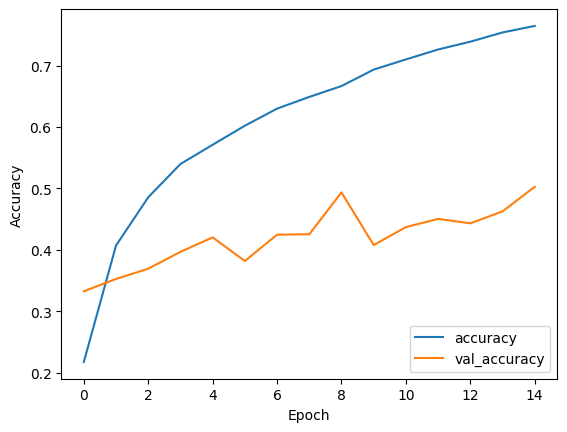

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model.save('/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/cnn_raw_model.h5')

## Make Predictions

#### Predictions on the raw image training set

The accuracy is 86% because the model was trained on this data

In [ ]:
ali_train_preds = model.predict(np.expand_dims(ali_image_data, axis=-1))

1101/1101 [==============================] - 6s 5ms/step


In [ ]:
ali_train_pred_labels = np.array([np.argmax(i) for i in ali_train_preds])

In [ ]:
accuracy_score(ali_train_pred_labels, ali_cleaned_labels)

0.862389229720518

In [ ]:
print(classification_report(ali_train_pred_labels, ali_cleaned_labels))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2882
           1       0.89      0.88      0.88      3557
           2       0.78      0.74      0.76      3735
           3       0.90      0.84      0.87      3784
           4       0.81      0.79      0.80      3591
           5       0.89      0.77      0.82      4110
           6       0.95      0.96      0.96      3441
           7       0.91      0.89      0.90      3615
           8       0.87      0.91      0.89      3348
           9       0.83      0.93      0.88      3145

    accuracy                           0.86     35208
   macro avg       0.86      0.87      0.86     35208
weighted avg       0.86      0.86      0.86     35208



In [ ]:
print(confusion_matrix(ali_train_pred_labels, ali_cleaned_labels))

[[2791    2   35    3    3    3   42    1    1    1]
 [  20 3117   68  137  128   12    8    1   18   48]
 [ 443   62 2754   45  232   35   58    4   95    7]
 [  59  111  118 3187  242   18    2    3   33   11]
 [  41   92  388  119 2853   16   17    4   57    4]
 [  31   45   45   11   20 3151    5  258  239  305]
 [  98    4   32    0    6    0 3298    0    3    0]
 [   5    1    1    0    0  181    6 3210    8  203]
 [  30   24   77   18   46   47   19    9 3063   15]
 [   0   63    3    7    1   69    1   46   16 2939]]


#### Predictions on the fashion-MNIST training set

The accuracy score is only 34%. This is higher than the baseline expectation of 10% (i.e. random guessing), and is also aligned with predictions below on the fashion-MNIST testing set  

In [ ]:
mnist_train_preds = model.predict(train_images)

1875/1875 [==============================] - 10s 5ms/step


In [ ]:
mnist_train_pred_labels = np.array([np.argmax(i) for i in mnist_train_preds])

In [ ]:
accuracy_score(mnist_train_pred_labels, train_labels)

0.34075

In [ ]:
print(classification_report(mnist_train_pred_labels, train_labels))

              precision    recall  f1-score   support

           0       0.24      0.29      0.26      4923
           1       0.65      0.70      0.67      5528
           2       0.16      0.26      0.20      3707
           3       0.20      0.71      0.31      1648
           4       0.66      0.25      0.37     15809
           5       0.00      0.08      0.00        48
           6       0.27      0.24      0.25      6721
           7       0.91      0.31      0.46     17773
           8       0.29      0.50      0.37      3456
           9       0.04      0.55      0.07       387

    accuracy                           0.34     60000
   macro avg       0.34      0.39      0.30     60000
weighted avg       0.59      0.34      0.39     60000



In [ ]:
print(confusion_matrix(mnist_train_pred_labels, train_labels))

[[1412   25  575  407  204  541  745  334  641   39]
 [ 292 3882  231  692   83   41  246    0   36   25]
 [ 780   70  977  439  523   86  478    2  312   40]
 [  78  153   44 1170   48    5  105    2   41    2]
 [1417 1759 2912 2296 3988   21 2543    1  816   56]
 [   1    0    0    6    1    4    1   16   17    2]
 [1684   32 1115  217 1054  340 1594    7  628   50]
 [ 179   10   14   98   18 4576  142 5475 1754 5507]
 [ 143   62  131  655   75  305  135  152 1731   67]
 [  14    7    1   20    6   81   11   11   24  212]]


In [ ]:
pd.DataFrame(mnist_train_pred_labels)[0].value_counts()

7    17773
4    15809
6     6721
1     5528
0     4923
2     3707
8     3456
3     1648
9      387
5       48
Name: 0, dtype: int64

#### Predictions on the Fashion-MNIST testing dataset

Accuracy score: 33%

In [ ]:
mnist_test_preds = model.predict(test_images)

313/313 [==============================] - 10s 6ms/step


In [ ]:
mnist_test_pred_labels = np.array([np.argmax(i) for i in mnist_test_preds])

In [ ]:
accuracy_score(mnist_test_pred_labels, test_labels)

0.3329

In [ ]:
print(classification_report(mnist_test_pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.23      0.27      0.25       859
           1       0.64      0.68      0.66       943
           2       0.17      0.28      0.21       598
           3       0.18      0.69      0.28       255
           4       0.63      0.24      0.35      2633
           5       0.00      0.29      0.00         7
           6       0.26      0.22      0.24      1171
           7       0.92      0.31      0.46      2939
           8       0.27      0.51      0.36       533
           9       0.04      0.56      0.07        62

    accuracy                           0.33     10000
   macro avg       0.33      0.41      0.29     10000
weighted avg       0.58      0.33      0.38     10000



In [ ]:
print(confusion_matrix(mnist_test_pred_labels, test_labels))

[[231   8 105  77  32  98 138  59 109   2]
 [ 55 638  33 123  12   7  57   0   8  10]
 [113  11 166  73  88  11  77   0  52   7]
 [ 14  29   7 177  11   0  10   0   6   1]
 [232 299 485 398 633   2 417   0 151  16]
 [  1   0   0   1   0   2   1   1   1   0]
 [296   4 177  34 212  69 259   1 112   7]
 [ 27   2   2  18   4 757  20 915 282 912]
 [ 29   7  24  97   8  42  21  22 273  10]
 [  2   2   1   2   0  12   0   2   6  35]]


In [ ]:
pd.DataFrame(mnist_test_pred_labels)[0].value_counts(normalize=True)

7    0.2939
4    0.2633
6    0.1171
1    0.0943
0    0.0859
2    0.0598
8    0.0533
3    0.0255
9    0.0062
5    0.0007
Name: 0, dtype: float64

#### Load saved convolutional NN model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/cnn_raw_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       2

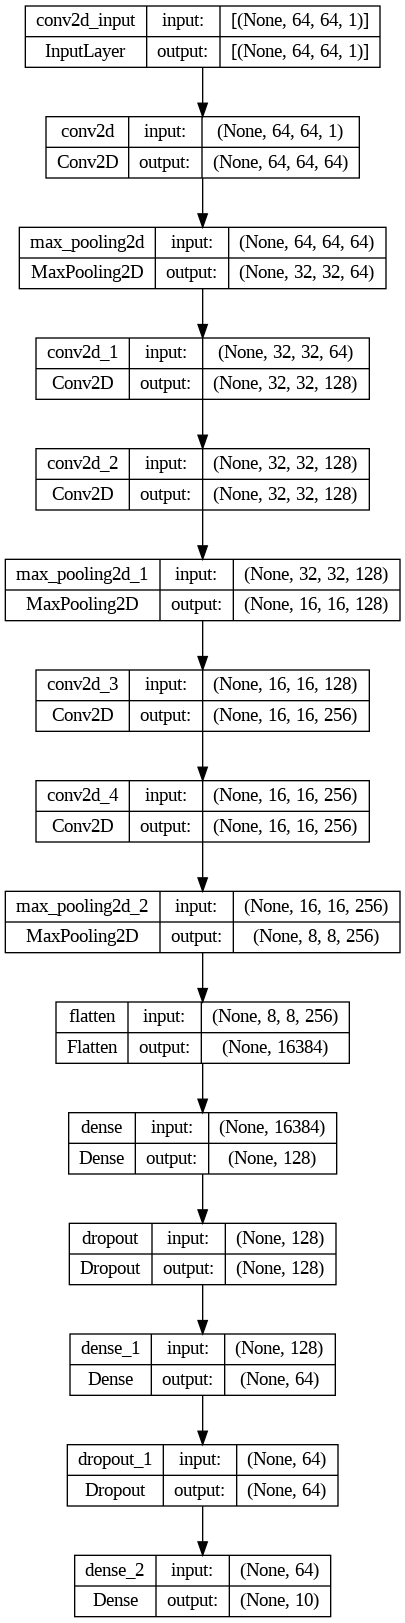

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
ali_image_data.shape

(35208, 64, 64)

In [14]:
pd.DataFrame(ali_cleaned_labels)[0].value_counts(normalize=True)

7    0.100432
8    0.100347
9    0.100347
5    0.100318
4    0.100290
3    0.100176
2    0.100006
1    0.100006
0    0.099920
6    0.098160
Name: 0, dtype: float64